Capture device is open: True


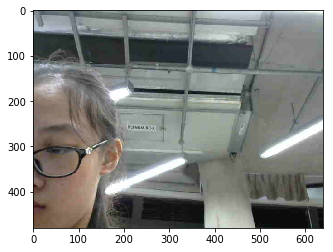

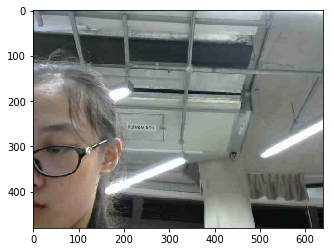

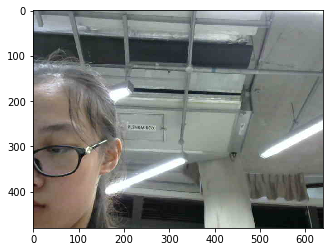

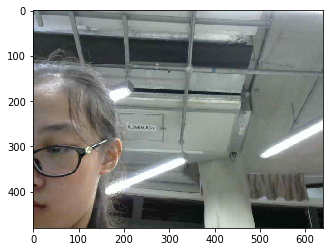

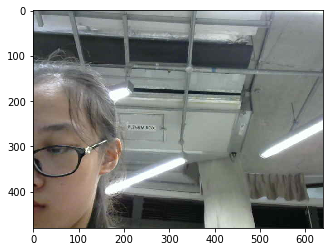

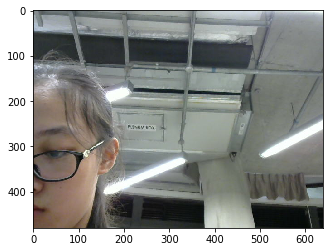

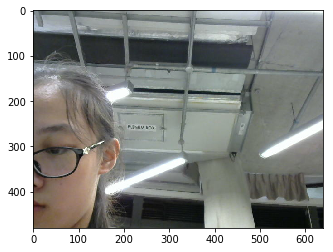

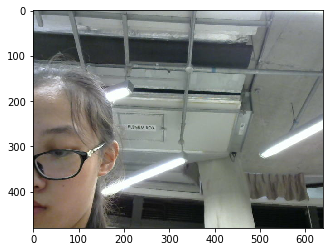

[[152 172 277 277]]


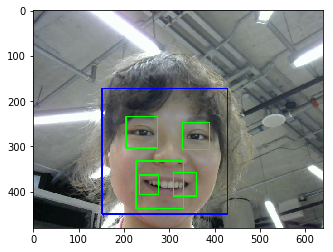

[[253 181 280 280]]


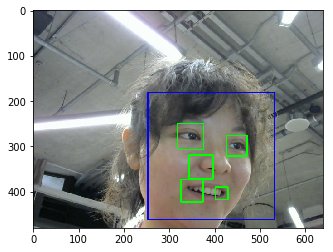

[[223 158 312 312]]


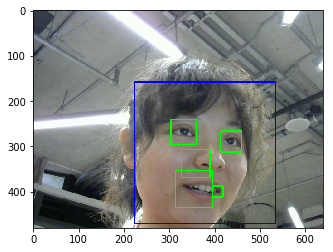

[[205 157 298 298]]


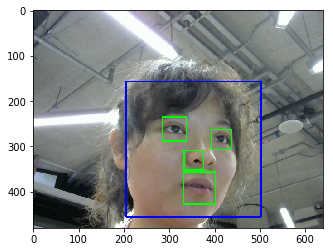

[[254 170 268 268]]


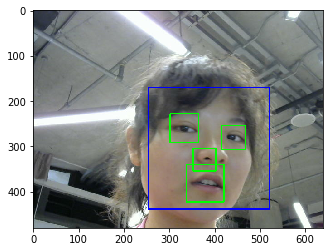

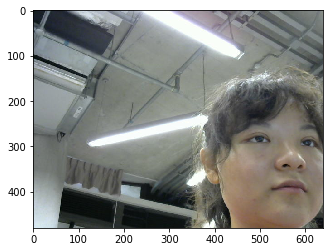

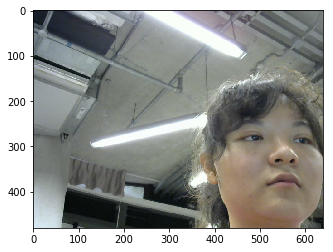

[[385 251 206 206]]


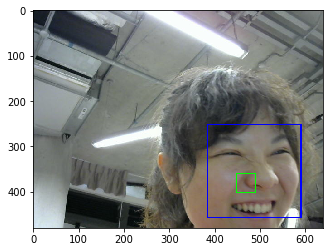

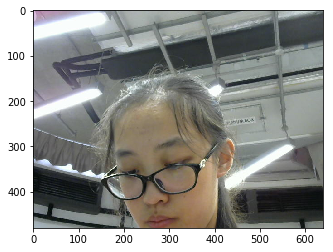

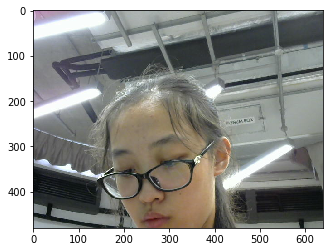

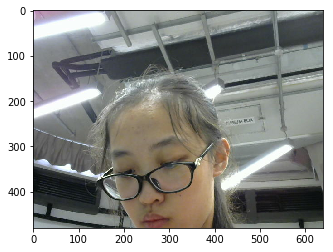

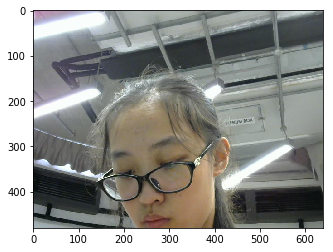

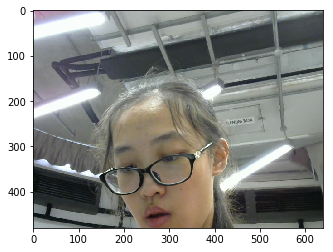

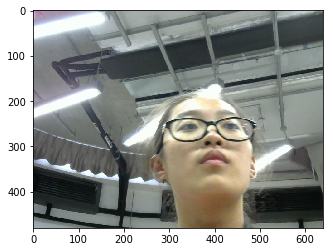

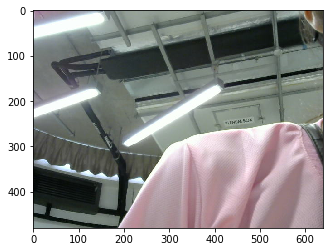

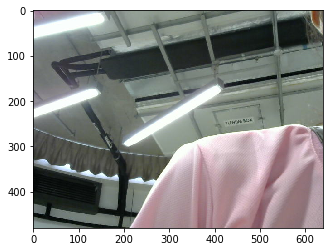

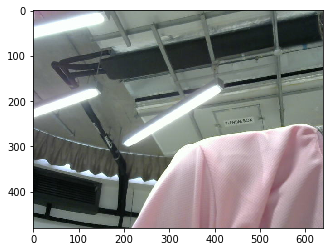

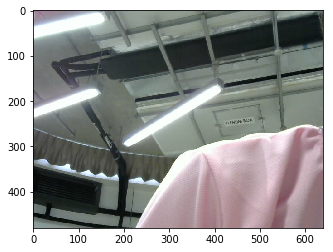

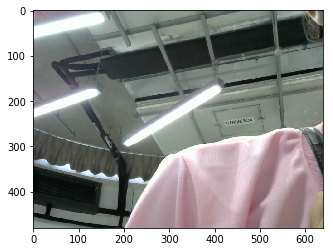

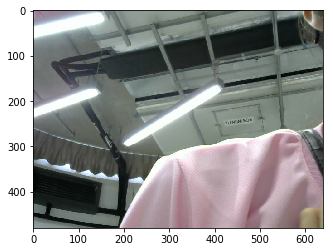

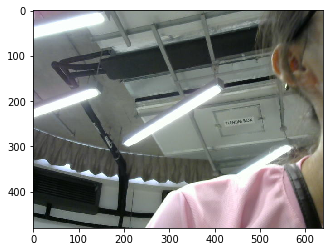

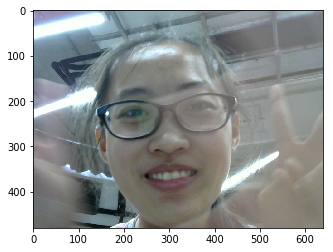

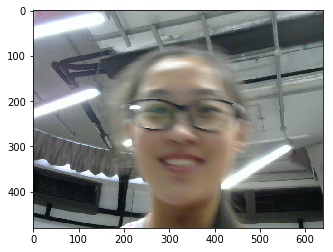

[[182 115 264 264]]


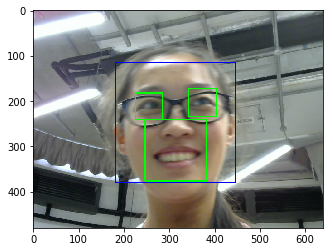

[[209  93 263 263]]


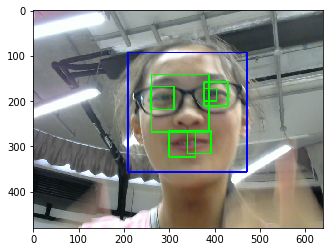

[[194  59 276 276]]


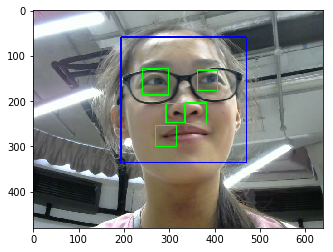

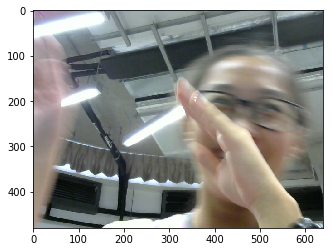

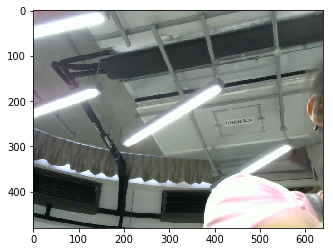

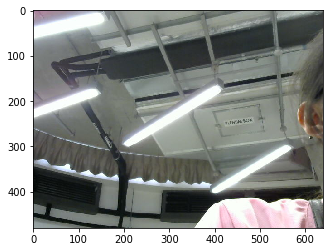

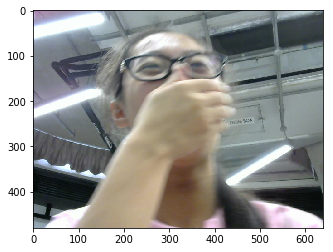

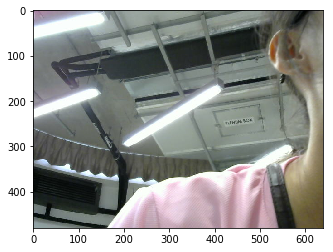

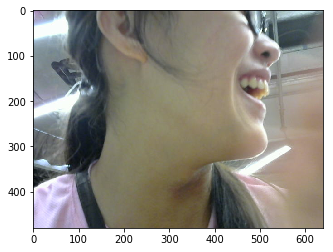

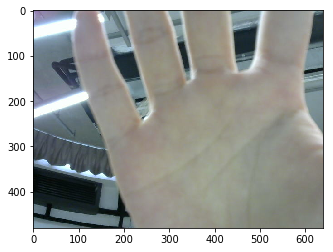

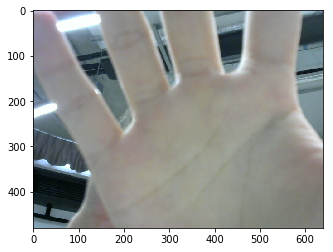

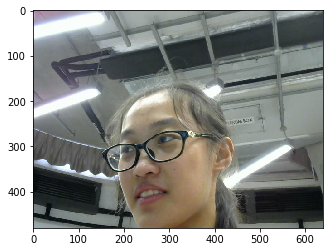

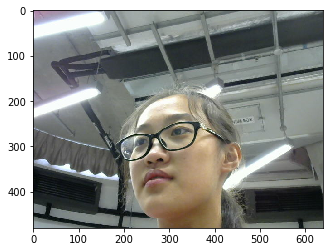

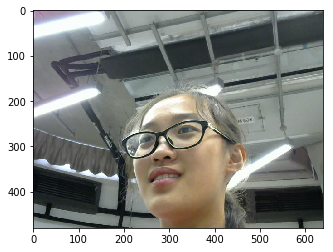

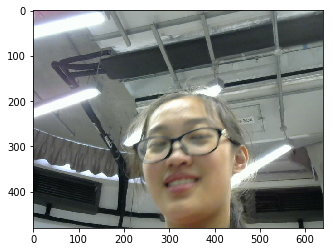

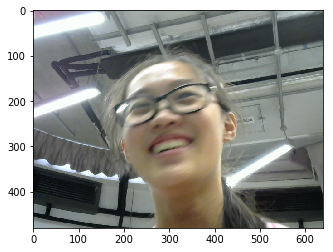

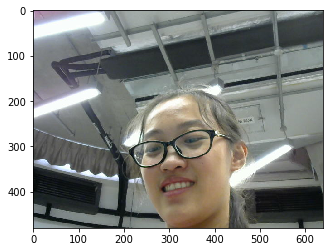

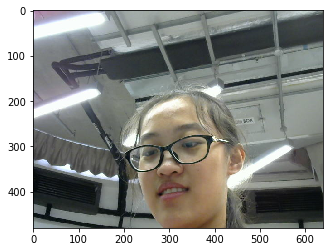

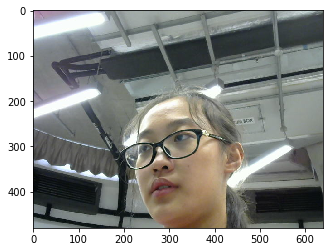

KeyboardInterrupt: 

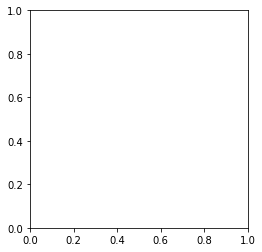

In [4]:
#Load the overlay

from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

# Initialize Webcam and HDMI Out
# Monitor configuration: 640*480 @ 60Hz

Mode = VideoMode(640,480,24)

### If HDMI cable and Monitor is available - uncomment the below lines 

# hdmi_out = base.video.hdmi_out
# hdmi_out.configure(Mode,PIXEL_BGR)
# hdmi_out.start()

# Initialize Webcam and HDMI Out
# Monitor (output) frame buffer size
### If HDMI cable and Monitor is available - uncomment the below lines 
frame_out_w = 1920
frame_out_h = 1080


# Camera (input) configuration
frame_in_w = 640
frame_in_h = 480


# Initialize camera from OpenCV
import cv2

videoIn = cv2.VideoCapture(0)
videoIn.set(cv2.CAP_PROP_FRAME_WIDTH, frame_in_w);
videoIn.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_in_h);

print("Capture device is open: " + str(videoIn.isOpened()))

#Apply the face detection to the input

import cv2

# Capture webcam image
import numpy as np

while (True):

    ret, frame_vga = videoIn.read()
    
    # Display webcam image via HDMI Out
    ### If HDMI cable and Monitor is available - uncomment the below lines 

    #if (ret):      
    #    outframe = hdmi_out.newframe()
    #    outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    #    hdmi_out.writeframe(outframe)
    #else:
    #    raise RuntimeError("Failed to read from camera.")

    np_frame = frame_vga

    face_cascade = cv2.CascadeClassifier(
        '/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(
        '/home/xilinx/jupyter_notebooks/base/video/data/'
        'haarcascade_eye.xml')

    gray = cv2.cvtColor(np_frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        cv2.rectangle(np_frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = np_frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        print (faces)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
    
    # Output OpenCV results via HDMI
    ### If HDMI cable and Monitor is available - uncomment the below lines 

    #outframe[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    #hdmi_out.writeframe(outframe)
	
    ### Display image in the terminal output window
	
    %matplotlib inline 
    from matplotlib import pyplot as plt
    import numpy as np
    plt.imshow(np_frame[:,:,[2,1,0]])
    plt.show()
    cv2.waitKey(200)
    